In [63]:
# We use torch and sklearn only on steps of fitting data
import torch
from tqdm import tqdm
from scipy.optimize import linprog
from torchvision import datasets
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Problem 2: Separating hyperplanes and the Perceptron Learning Algorithm (3pts)
### <div align="right"> &copy; Yurii Yeliseev & Rostyslav Hryniv, 2022 </div>

## Completed by:   
*   Serhii Marinchenko
*   Volodymyr Leha

### Description:
#### The aim of this task is to discuss a simple binary classification method for linearly separated classes. The Perceptron Learning Algorithm finds a ***separating hyperplane*** in finitely many steps and is based on a clear geometric update method. We will derive the upper bound on the number of iterations in PLA and implement it for digit classification for the MNIST database.

#### For this task of your homework you can get 3 points. Do not forget to save and rename the notebook before making any changes!

## 1. Separating hyperplanes and classification (0.9 pts)

### 1.1. Binary classification.    
A typical task of binary classification reads as follows. We are given the set of labelled (training) data $(\mathbf{x}_k, y_k), k=1,2,\dots, N$, where $\mathbf{x}_k \in \mathbb{R}^d$ gives a data point and the label $y_k = \pm1$ encodes the class (e.g. $y_k=1$ is the <font color='red'>''red''</font> class and $y_k=-1$ is the <font color='blue'>''blue''</font> one). The task is to find a classfier $f \,:\, \mathbb{R}^d \to \pm1$ that would correctly recognize the classes, i.e. satisfy $y_k f(\mathbf{x}_k) >0$ for all (or most) $k=1,2,\dots,N$. This function can then be used to guess the class of new (unseen) data $\mathbf{x}\in\mathbb{R}^n$.



### 1.2. Separating hyperplane  
The simplest case is when the red and blue classes are *linearly separable*, i.e., when there is a hyperplane $H: \mathbf{w} \cdot \mathbf{x} + w_0 = 0$ separating the red and blue datapoints. Then  $f(\mathbf{x}) = \mathbf{w}\cdot \mathbf{x} + w_0$ is an affine classifier, so that $f(\mathbf{x}_k)>0$ for red points and $f(\mathbf{x}_k)<0$ for blue ones. Augmenting $\mathbf{x}$ to $\widehat{\mathbf{x}} := (1, \mathbf{x})$ and $\widehat{\mathbf{w}} = (w_0,\mathbf{w})$, we recognize that $f(\mathbf{x})= \widehat{\mathbf{x}}\cdot \widehat{\mathbf{w}}$. Therefore, the angles between $\widehat{\mathbf{x}}$ and $\widehat{\mathbf{w}}$ are acute for red datapoints and obtuse for the blue ones. The task is therefore to find the *normal vector* $\widehat{\mathbf{w}}$ with this properties.

### 1.3. The idea behind the Perceptron learning algorithm (PLA)

To simplify the notations, in what follows we will omit the "hats" above the $(d+1)$-dimensional vectors $\widehat{\mathbf{x}}$ and $\widehat{\mathbf{w}}$.

PLA is an iterative algorithm that updates the direction vector ${\mathbf{w}}$ towards a misclassified example, one at a time.

Let's recall that correctly classified vectors $\mathbf{x}_j$ must satisfy the inequality
$$
  y_j ({\mathbf{w}}\cdot {\mathbf{x}}_j) > 0.
$$
If a red $\mathbf{x}_j$ is misclassified, then the angle between ${\mathbf{w}}$ and ${\mathbf{x}}_j$ is obtuse. The idea is that we should decrease the angle between them by updating ${\mathbf{w}}$ to ${\mathbf{w}} + {\mathbf{x}}_j$ (see Figure 1). Likewise, if a blue $\mathbf{x}_j$ is misclassified, then the angle between ${\mathbf{w}}$ and ${\mathbf{x}}_j$ is acute, and we increase it be replacing ${\mathbf{w}}$ with ${\mathbf{w}} - {\mathbf{x}}_j$. In both cases, the update is $${\mathbf{w}} \mapsto {\mathbf{w}} + y_j {\mathbf{x}}_j$$

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
</head>
<body>
    <img src="https://drive.google.com/uc?export=view&id=12rduejeedS8NxrxXkSBJkkcDH3lB0k-R">


</body>
</html>

### 1.4. **PLA**

The above considerations suggest the following **PLA**:
1.   Start with ${\mathbf{w}}_0=\mathbf{0}$ and classify the points
2.   Take an arbitrary misclassified point
3.   Update the ${\mathbf{w}}$
4.   Update the classification
5.   Repeat 2-4 until there are misclassified points.


### 1.5. **PLA**: proof of convergence (0.9 pts)

---

#### **1.5.1 (0.3 pts)** Analyze the PLA update step  
Prove that by updating ${\mathbf{w}}$, we are decreasing or increasing (as required) the angle between ${\mathbf{w}}$ and ${\mathbf{x}}_j$.

---

\#### Your proof comes here \####

---
$cos(\theta) = \displaystyle\frac{w\cdot x}{||w||\cdot||x||}.\;$ Updating $w_{k+1} = w_k+x_t\cdot y_t$ yields $cos(\theta_{k+1}) = \displaystyle\frac{x_t\cdot w_{k+1}}{||x_t||\cdot ||w_{k+1}||} = \displaystyle\frac{x_t\cdot w_{k} + y_t||x_t||^2}{||x_t||\cdot ||w_{k} + y_t\cdot x_t||}.\;$ Since $x_t \cdot w_k$ is always of the opposite sign to $y_t||x_t||$, $x_t\cdot w_k + y_t||x_t||^2$ will increae negative cos($\theta$) (and decrease obtuse angle $\theta$) when red point is misclassified. And an update will decrease the positive $cos(\theta)$ (and increase acute angle $\theta$) when red point is misclassified.

#### **Assumptions and notations**

***Assumption on linear separability*** There exists an ${\mathbf{w}^{\star}} \in \mathbb{R}^{d+1}$ of unit length and $\gamma > 0$ such that $$y_k\, {\mathbf{x}}_k\cdot {\mathbf{w}}^{\star} \ge \gamma, \qquad k=1,2,\dots, n.$$ The value $\gamma$ determines the width of the *separating slab* free of any datapoints. The larger $\gamma$, the wider the slab and the more robust the classifier is to noise in data.  

We also denote by $R$ the maximum norm of $\mathbf{x}_k$

***Theorem on PLA convergence.*** The PLA makes at most $\frac{R^2}{\gamma^2}$ updates, after which it returns a separating hyperplane.

***Proof.*** Should the algorthm terminate, then the resulting ${\mathbf{w}}$ determines a separating hyperplane. Thus it suffices to show that the algorithm terminates after at most $\frac{R^2}{\gamma^2}$ updates. The approach is to get upper and lower bounds on the norm of the $k^{\mathrm{th}}$ update ${\mathbf{w}}_k$ of the weighting vector ${\mathbf{w}}$, starting with ${\mathbf{w}}_0 = \mathbf{0}$.

Assume that $k\ge 1$ and ${\mathbf{x}}_j$ is a misclasssified point on iteration $k$; then
$$
\begin{aligned}
\mathbf{w}_{k+1} \cdot {\mathbf{w}}^{\star} &=\left({\mathbf{w}}_k + y_j \mathbf{x}_j\right) \cdot {\mathbf{w}}^{\star} \\
&={\mathbf{w}}_k \cdot {\mathbf{w}}^{\star}+y_j\left({\mathbf{x}}_j \cdot {\mathbf{w}}^{\star}\right) \\
&>{\mathbf{w}}_k \cdot {\mathbf{w}}^{\star} + \gamma
\end{aligned}
$$

---


#### **1.5.2. (0.3 pts)** Explain by induction that ${\mathbf{w}}_{k} \cdot {\mathbf{w}}^{\star}> k \gamma$.

---

\#### Your proof comes here \####

---

Induction step is already shown to hold in last paragraph. Applying the induction step recursively to inequality $w_{k+1}\cdot w^{\star} > w_k\cdot w^{\star} + \gamma$ yields:
$\\ w_k \cdot w^{\star} > w_{k-1}\cdot w^{\star} + \gamma \;$ and $\;w_{k-1}\cdot w^{\star} > w_{k-2}\cdot w^{\star} + \gamma  \implies w_k \cdot w^{\star} > w_{k-2}\cdot w^{\star} + 2\gamma.\;$ After k iterations we have: $w_k \cdot w^{\star} > w_{1}\cdot w^{\star} + k\gamma.$

As a result, we see that
$$\|\mathbf{w}_k\| \ge {\mathbf{w}}_{k} \cdot {\mathbf{w}}^{\star}> k \gamma\tag{1}$$

To obtain the upper bound, we argue that
$$
\begin{aligned}
\left\|\mathbf{w}_{k+1}\right\|^2 &=\left\|\mathbf{w}_k+y_j \mathbf{x}_j\right\|^2 \\
&=\left\|\mathbf{w}_k\right\|^2+\left\|y_j \mathbf{x}_j\right\|^2+2\left(\mathbf{w}_k \cdot \mathbf{x}_j\right) y_j \\
&=\left\|\mathbf{w}_k\right\|^2+\left\|\mathbf{x}_j\right\|^2+2\left(\mathbf{w}_k \cdot \mathbf{x}_j\right) y_j
\end{aligned}
$$

---

#### **1.5.3. (0.3 pts)** Derive the lower bound
$$
\begin{aligned}
\left\|\mathbf{w}_{k+1}\right\|^2
&\le\left\|\mathbf{w}_k\right\|^2+\left\|\mathbf{x}_j\right\|^2 \\
&\le\left\|\mathbf{w}_k\right\|^2+R^2
\end{aligned}
$$
and use induction to conclude that
$$
\left\|\mathbf{w}_{k}\right\|^2 \le k\, R^2 \tag{2}
$$

---

\#### Your proof comes here \####

---


The same reasoning applies. $||w_1|| \leq ||w_0|| + R^2\; and \; ||w_2|| \leq ||w_1|| + R^2\ \implies ||w_2|| \leq ||w_0|| + 2R^2.$

Repeating the step k times yields: $||w_k|| \leq ||w_0|| + kR^2$. And since $||w_0|| = 0$, $||w_k|| \leq kR^2.$


Together, (1) and (2) yield
$$
k^2 \gamma^2<\left\|\mathbf{w}_{k}\right\|^2 \le k R^2,
$$
which implies the bound $k<\frac{R^2}{\gamma^2}$ and finishes the proof.

## 2. PLA implementation on MNIST dataset (1.8 pts)

### 2.1. Data

`train_data` is torch dataset object where images and targets lie inside `train_data.data` and `train_data.targets` respectively. To convert to numpy array you can use `.numpy()` method.

In [64]:
train_data = datasets.MNIST(root='data', train=True, download=True)
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

### 2.2 Take 2 digits samples **(0.3 pts)**

First of all you need to take only two digits samples from the dataset and convert the targets properly for the PLA. Choose the two digits based on the sum of your birthdays (e.g. 2 and 4 if it is 24; take 4 and 5 if it is 44)

In [65]:
def filter_data(train_data, digit_1, digit_2):
    """
    Take only digit_1 and digit_2 from the dataset and transform labels
    Args:
        train_data: torchvision.datasets.mnist.MNIST
        digit_1: int (from 0 to 9)
        digit_2: int (from 0 to 9)

    Returns:
        train_data: torchvision.datasets.mnist.MNIST or np.array
    """
    # ========= YOUR CODE STARTS HERE ========= #
    digits_cls = torch.tensor([digit_1, digit_2])
    indices = torch.isin(train_data.targets, digits_cls)
    train_data.data, train_data.targets = train_data.data[indices], train_data.targets[indices]
    # ========== YOUR CODE ENDS HERE ========== #
    return train_data

In [66]:
train_data = filter_data(train_data, 3, 2)

### 2.3 Take a smaller subset and divide it into train and test sets **(0.3 pts)**


Since the dataset is big, you need to use only part of it in this task (take
~20-30% of the whole dataset for further processing).

1. Properly subdivide dataset
2. Calculate number samples in each class for test and train

***Note***: you need to have same distributions inside train and test set

In [67]:
def split_dataset(train_data):
    """
    Split dataset into train and test parts.

    !Hint: You can use train_test_split from sklearn for that

    Args:
        train_data: torchvision.datasets.mnist.MNIST or np.array

    Returns:
        X_train: Array of shape (N, 28, 28), images from the train set
        y_train: Array of shape (N), labels from the train set

        X_test: Array of shape (N, 28, 28), images from the test set
        y_test: Array of shape (N), labels from the test set
    """
    # ========= YOUR CODE STARTS HERE ========= #
    X_train, X_test, y_train, y_test = train_test_split(train_data.data, train_data.targets, test_size=0.33, stratify = train_data.targets, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.33, stratify = y_test, random_state=42)
    # ========== YOUR CODE ENDS HERE ========== #
    return X_train, X_test, y_train, y_test

In [68]:
X_train, X_test, y_train, y_test = split_dataset(train_data)

In [69]:
print(f"Number of samples in train: {len(X_train)} \n\
Classes number in train: {torch.sum(y_train == 3)}, {torch.sum(y_train == 2)} \n\
Number of samples in test: {len(X_test)} \n\
Classes number in test: {torch.sum(y_test == 3)}, {torch.sum(y_test == 2)}")

Number of samples in train: 2673 
Classes number in train: 1356, 1317 
Number of samples in test: 1317 
Classes number in test: 668, 649


### 2.4 Visualize samples for the train set

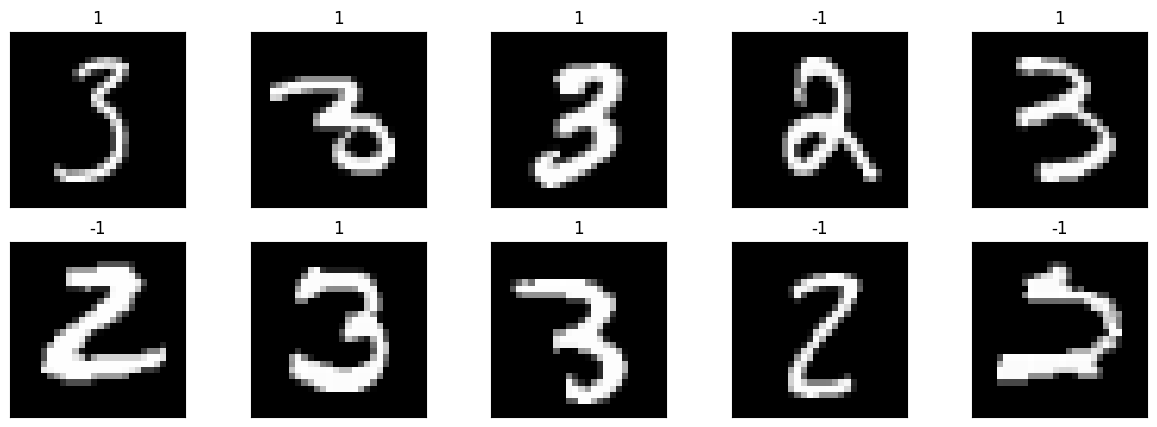

In [70]:
myd = {3:1, 2:-1}
y_train = np.vectorize(myd.get)(y_train)

fig = plt.figure(figsize=(15, 5))
for idx in np.arange(10):
    ax = fig.add_subplot(2, 5, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[idx].numpy()), cmap='gray')
    ax.set_title(str(y_train[idx].item()))

### 2.5 Preprocess the samples and initialize $\mathbf{w}$ **(0.4 pts)**

The original algorithm starts from zero parameter vector, but actually we can use just randomly initialized vector; it will make it faster to converge

**Instructions**: Complete the missing lines of code and calculate the performance on test set

In [71]:
def prep_data(X_train):
    """
    Flatten, normalize and extra column for bias
    Args:
        X_train: np.array of shape (N, 28, 28)

    Returns:
        X: preprocessed data
    """
    # ========= YOUR CODE STARTS HERE ========= #
    
    X = X_train.reshape(X_train.shape[0], -1)
    vmean = np.apply_along_axis(np.mean, 1, X).reshape(-1, 1)
    vsd = np.apply_along_axis(np.std, 1, X).reshape(-1, 1)
    X = (X - vmean) / vsd
    X = np.append(X, np.ones((X.shape[0], 1)), 1)
    # ========== YOUR CODE ENDS HERE ========== #
    return X

def initialize_weight_vector(size):
    """
    Create random parameter vector
    Args:
        size: Number of elements

    Returns:
        W: np.array of shape (size)
    """
    # ========= YOUR CODE STARTS HERE ========= #

    W = np.random.randn(size)

    return W
    # ========== YOUR CODE ENDS HERE ========== #

def misclassified(X, y, W):
    """
    Calculate indices of missclasified points
    Args:
        X: np.array, training images
        y: np.array, training labels
        w: np.array, parameter vector

    Returns:
        M: np.array of shape (m) - indices of missclasified points, where m is a number of missclasified points
    """
    # ========= YOUR CODE STARTS HERE ========= #

    # myd = {3:1, 2:-1}
    # y = np.vectorize(myd.get)(y)

    cond = np.logical_or(np.logical_and(((X @ W) > 0).flatten(), (y < 0)), np.logical_and(((X @ W) < 0).flatten(), (y > 0)))

    M = np.array(list(range(0, X.shape[0])))[cond]
    return M
    # ========== YOUR CODE ENDS HERE ========== #


X_train_flat_aug = prep_data(X_train)
W = initialize_weight_vector(X_train_flat_aug.shape[1])

### 2.6 Training loop **(0.5 pts)**
Here you need to complete the training loop of the PLA algorithm. Observe that recalculation the misclassified set (Step 3 of the PLA algorithm) is the most costly (as we need to iterate through the whole train set). To speed up the algorithm convergence, we will do the following:
-  determine the set $S$ of misclassified datapoints
-  for every $\mathbf{w}\in S$ that is still misclassified, update the vector $\mathbf{w}$
-  only after that recalculate the set $S$

In [72]:
"""
    Returns:
        W: the final vector of weights for the separating hyperplane
"""

misclass = np.array([2])

while (misclass.shape[0] != 0):

    misclass = misclassified(X_train_flat_aug, y_train, W)
    print(len(misclass))

    for j in range(0, misclass.shape[0]):

        current_x, current_y = X_train_flat_aug[misclass[j], :], y_train[misclass[j]]

        if (current_y * (current_x @ W) < 0):
            W += current_y * current_x

1093
724
797
1061
959
999
712
801
867
877
985
816
877
660
568
691
780
655
647
690
744
716
710
525
569
757
494
746
668
688
559
584
565
717
581
980
387
391
485
564
496
514
481
600
458
456
381
654
382
608
349
609
377
521
428
582
419
543
334
543
426
389
527
493
339
348
475
376
421
510
426
361
442
556
281
563
269
544
367
481
403
374
420
375
317
557
512
550
407
626
352
534
314
504
328
423
288
442
325
459
269
433
283
308
229
363
311
297
401
382
300
380
346
249
349
436
305
461
389
379
236
335
363
379
217
454
251
495
285
431
185
255
246
225
421
310
267
416
187
280
235
494
245
314
229
320
256
292
280
366
324
280
305
423
219
366
248
263
365
331
308
421
242
257
269
276
237
260
186
221
188
282
261
430
218
249
277
294
237
233
289
296
214
313
225
274
200
332
244
351
214
332
248
227
210
213
255
288
190
188
208
211
151
345
207
275
314
304
198
264
283
392
199
306
239
279
196
199
184
255
187
212
197
164
200
229
199
220
241
273
241
241
228
158
209
273
244
207
232
223
235
213
220
277
204
167
185
165
194
32

141
106
121
87
121
89
159
74
141
60
87
105
87
51
93
45
86
105
175
75
154
102
97
109
162
105
105
112
106
65
112
88
114
82
104
77
163
71
128
137
95
100
119
115
105
46
116
60
137
94
110
115
113
120
99
154
74
84
176
124
97
121
168
117
126
77
111
122
136
137
71
81
81
94
67
36
131
91
47
44
94
66
71
79
85
113
86
68
118
60
134
48
103
39
66
89
114
131
78
39
123
45
103
57
69
58
151
82
94
66
109
72
95
43
79
74
100
61
118
66
68
93
95
60
119
42
79
74
86
50
94
68
169
70
92
94
84
118
92
71
71
53
73
69
108
67
87
40
115
33
105
39
140
61
134
67
104
54
88
55
78
33
79
49
56
53
73
29
56
57
65
74
91
41
60
66
123
65
109
76
115
83
62
61
58
26
65
59
79
56
69
70
59
59
74
26
112
40
90
53
85
46
119
42
72
66
55
80
43
36
135
42
82
45
109
38
78
44
70
31
92
54
39
32
56
73
91
38
78
56
75
57
73
29
75
40
86
33
106
27
49
69
76
49
94
30
141
53
94
62
74
43
56
28
108
49
50
27
50
34
39
56
61
26
57
21
75
59
46
63
37
31
92
28
60
45
83
17
77
59
36
33
73
32
40
53
38
23
133
61
72
42
53
50
45
28
86
17
32
42
79
31
54
62
55
61
96
33

### 2.7 Evaluate performance of the linear classifier on the test set **(0.3 pts)**

Check your classifier on the test set. Think of possible metrics that characterize performance and comment on how good the classifier is

In [73]:
# ========= YOUR CODE STARTS HERE ========= #
X_test_flat_aug = prep_data(X_test)

X_test_flat_aug.shape

pred = np.sign(X_test_flat_aug @ W)

y_test01 = np.vectorize(myd.get)(y_test)
acc = (pred == y_test01).mean()

print(f"The accuracy of the classifier on the test set equls {acc}")
# ========== YOUR CODE ENDS HERE ========== #

The accuracy of the classifier on the test set equls 0.9460895975702354


## 3. Conclusions **(0.3 pts)**

Summarize in a few sentences what you have learned and achieved by completing the tasks of this assignment


\### **YOUR ANSWER HERE** \###

We have learned to implement the perceptron algorithm from scratch using simple linear algebra operations. The algorithm uses the geometry of sample space and constructs the optimal separating hyperplane that splits all samples into two classes.